This notebook requires:
* jupyter
* nglview
* matplotlib
* seaborn
* mdtraj

Copy data from cluster with:

scp -rC chodera@hal.cbio.mskcc.org:/cbio/jclab/projects/behrj/AURKA_UMN/output-11414/data/11414_"*"_284-225_SB_total.npy .

for (projects 11414, 11418, 11419, 11423)

mdconvert -o trajectory.pdb -i 0 trajectory.h5
mdconvert -o trajectory.dcd trajectory.h5


In [37]:
%matplotlib inline

In [1]:
import nglview
import mdtraj

In [51]:
def retrieve_trajectory(project, run, clone):
    print("Retrieving project %d run %d clone %d..." % (project, run, clone))
    # Copy the trajectory locally.
    import os
    os.system("scp -C chodera@hal.cbio.mskcc.org:/cbio/jclab/projects/fah/fah-data/munged3/no-solvent/%d/run%d-clone%d.h5 trajectory.h5" % (project, run, clone))
    # Load and return it.
    import mdtraj as md
    traj = md.load('trajectory.h5')
    # Image trajectory
    print('Imaging molecules...')
    traj.image_molecules(inplace=True)
    # Align trajectory
    print('Aligning to first frame...')
    traj.superpose(traj,0)
    print('Done.')
    return traj    

In [65]:
def view_trajectory(traj):
    import nglview as nv
    view = nglview.show_mdtraj(traj.superpose(traj,0))
    #view.component_0.clear_representations()
    #view.component_0.add_cartoon()
    view.add_representation('cartoon', selection='protein', color='green')
    view.add_representation('cartoon', selection='1-42', color='yellow')
    #activation_loop = traj.top.select("(resSeq >= 281) and (resSeq <= 293)")
    activation_loop = '281-293'
    view.add_representation('cartoon', selection=activation_loop, color='red')    
    view.add_representation('licorice', selection='288', color='purple')    
    view.add_representation('licorice', selection='284', color='blue')    
    view.add_representation('licorice', selection='225', color='blue')    
    return view

In [52]:
traj = retrieve_trajectory(11414, 0, 38)

Retrieving project 11414 run 0 clone 38...
Imating molecules...
Aligning to first frame...
Done.


In [66]:
view_trajectory(traj)

In [40]:
import numpy as np
dist = np.load('11414_0_284-225_SB_total.npy')
dist = dist[:,:,0]
print(dist.shape)

(50, 2000)


In [47]:
# find clone with maximum range
nclones = dist.shape[0]
dist_range = dist.max(1) - dist.min(1)
clone = np.argmax(dist_range)
print(clone)

38


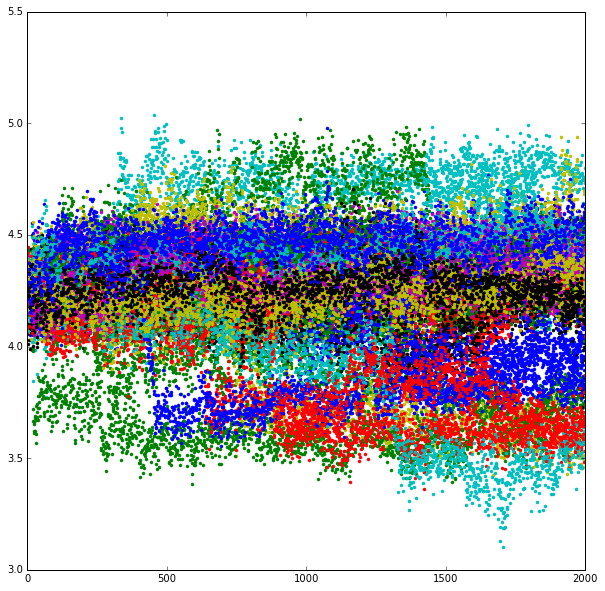

In [42]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(dist.T,'.');

In [70]:
traj.save('trajectory-aligned.dcd')

In [72]:
traj[0].save('trajectory-aligned.pdb')